## **ADS** **Project**

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [99]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Understanding columns



1.  age - age in years
2.  sex - (1 = male; 0 = female)


3.   cp - chest pain type


*   0: Typical angina: chest pain related decrease blood supply to the heart
*   1: Atypical angina: chest pain not related to heart



*   2: Non-anginal pain: typically esophageal spasms (non heart related)
*   Asymptomatic: chest pain not showing signs of disease



4.   trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5.  chol - serum cholestoral in mg/dl

*  serum = LDL + HDL + .2 * triglycerides
*   above 200 is cause for concern

6.   fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*  '>126' mg/dL signals diabetes
7.   restecg - resting electrocardiographic results
*  0: Nothing to note
*  1: ST-T Wave abnormality
**       can range from mild symptoms to severe problems
** signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) 

















In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [101]:
df.shape

(303, 14)

In [102]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [103]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

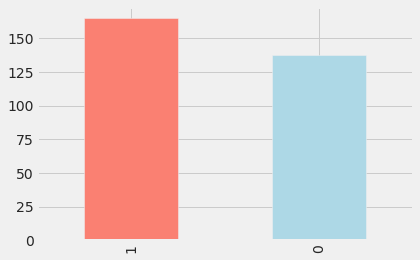

In [104]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [105]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we can see there is no missing values 

In [106]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [107]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

we can see there are 9 cat variables and 5 continous variables

## **Hist Plots for categorical** **variables**

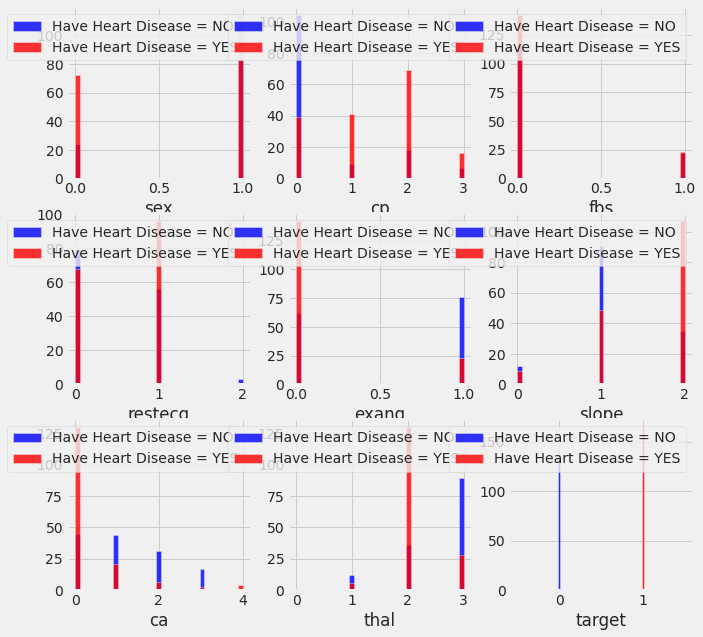

In [108]:
plt.figure(figsize=(10, 10))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.8)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.8)
    plt.legend()
    plt.xlabel(column)

## **Hist Plots for Continous Variables**

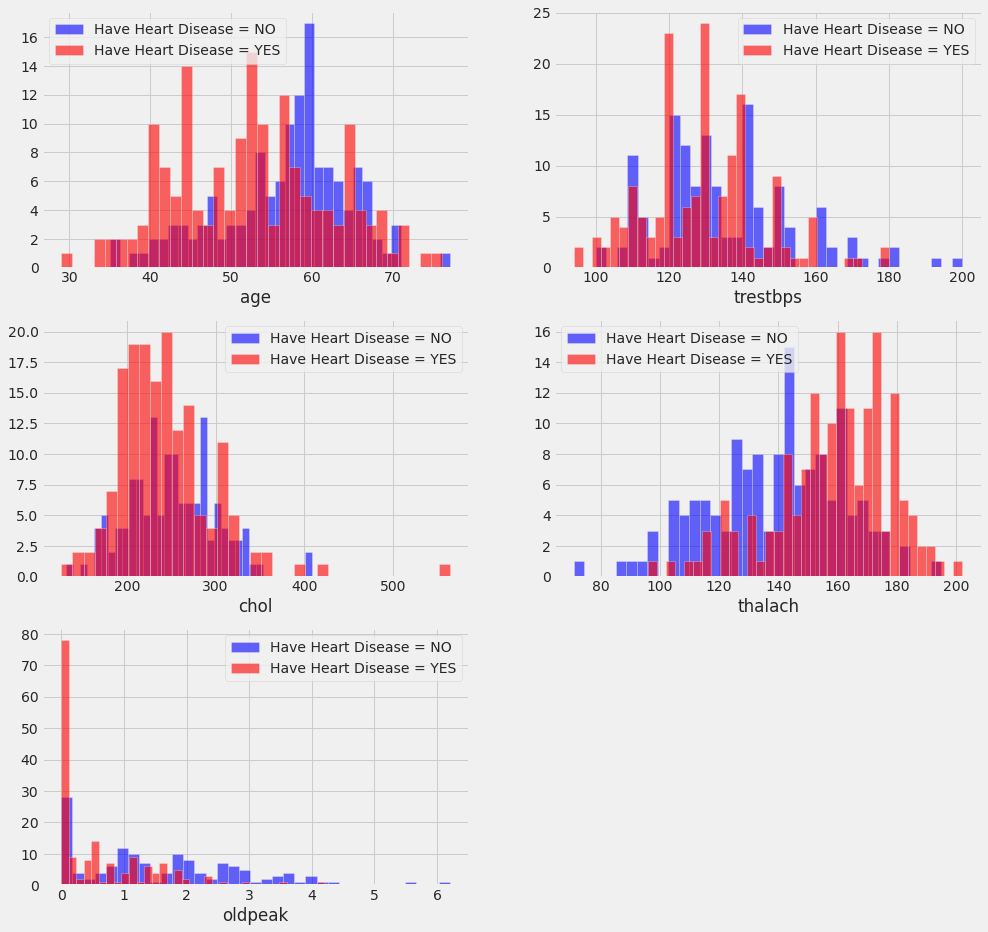

In [109]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Heat Map to see correlation b/w all variables

(14.5, -0.5)

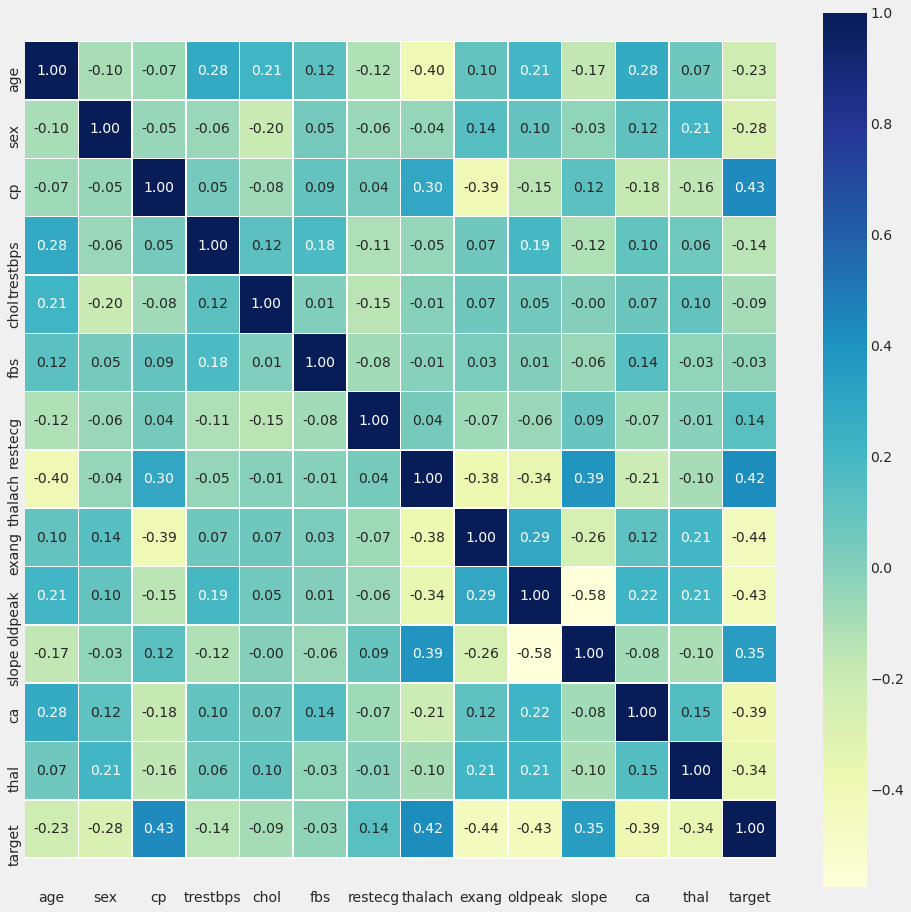

In [110]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [111]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [112]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [113]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [114]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


splitting data for traning and testing

In [115]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

function to see accuracy_score, confusion_matrix, classification_report for all ML Models

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### **Logistic** **Regression**

In [117]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.871795   0.865385  0.868132   0.868590      0.868273
recall      0.829268   0.900000  0.868132   0.864634      0.868132
f1-score    0.850000   0.882353  0.868132   0.866176      0.867776
support    41.000000  50.000000  0.868132  91.000000     91.000000
_____________

In [118]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187


### **KNN Classifier**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.863158    0.871795  0.867925    0.867476      0.867843
recall      0.845361    0.886957  0.867925    0.866159      0.867925
f1-score    0.854167    0.879310  0.867925    0.866739      0.867806
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.853659   0.88  0.868132   0.866829      0.868132
recall      0.853659   0.88  0.868132   0.866829      0.868132
f1-score    0.853659   0.88  0.868132   0.866829      0.868132
support    41.000000  50.00  0.868132  91.000000     91.000000
_________________________________

In [120]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187
1,K-nearest neighbors,86.792453,86.813187


### **Decision Tree Classifier**

In [121]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.723404   0.840909   0.78022   0.782157      0.787967
recall      0.829268   0.740000   0.78022   0.784634      0.780220
f1-score    0.772727   0.787234   0.78022   0.779981      0.780698
support    41.000000  50.000000   0.78022  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [122]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,86.813187
1,K-nearest neighbors,86.792453,86.813187
2,Decision Tree Classifier,100.000000,78.021978


From three models we can see logistic and knn has same accuracy and decision tree has more training accuracy and less testing accuracy

### **Logistic Regression with Hyper Parameters Tuning**

In [123]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20)}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params,scoring='accuracy',n_jobs=-1,cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Best parameters: {'C': 4.281332398719396}
Train Result:
Accuracy Score: 88.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.892473    0.882353  0.886792    0.887413      0.886983
recall      0.855670    0.913043  0.886792    0.884357      0.886792
f1-score    0.873684    0.897436  0.886792    0.885560      0.886568
support    97.000000  115.000000  0.886792  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  14]
 [ 10 105]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.825000   0.843137  0.835165   0.834069      0.834966
recall      0.804878   0.860000  0.835165   0.832439      0.835165
f1-score    0.814815   0.851485  0.835165   0.833150      0.834963
support    41.000000  50.000000  0.835

In [124]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.679245,83.516484


### **KNN classifier with Hyper parameters tuning**

In [125]:
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)
knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf,hyperparameters,n_jobs=-1,cv=10)
knn_cv.fit(X_train, y_train)
best_params = knn_cv.best_params_
print(f"Best parameters: {best_params}")
knn_clf = KNeighborsClassifier(**best_params)

knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Best parameters: {'leaf_size': 1, 'n_neighbors': 6}
Train Result:
Accuracy Score: 87.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.851485    0.900901  0.877358    0.876193      0.878291
recall      0.886598    0.869565  0.877358    0.878082      0.877358
f1-score    0.868687    0.884956  0.877358    0.876821      0.877512
support    97.000000  115.000000  0.877358  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 86  11]
 [ 15 100]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.777778   0.869565  0.824176   0.823671      0.828210
recall      0.853659   0.800000  0.824176   0.826829      0.824176
f1-score    0.813953   0.833333  0.824176   0.823643      0.824602
support    41.000000  50.000

In [126]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.679245,83.516484
1,Tuned K-nearest neighbors,87.735849,82.417582


### **Decision Tree Classifier with Hyper Parameters tuning**

In [127]:
from sklearn.model_selection import GridSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)

tree_cv = GridSearchCV(tree_clf, params,n_jobs=-1,cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")
tree_clf = DecisionTreeClassifier(**best_params)

tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.904762    0.835938  0.863208    0.870350      0.867428
recall      0.783505    0.930435  0.863208    0.856970      0.863208
f1-score    0.839779    0.880658  0.863208    0.860219      0.861954
support    97.000000  115.000000  0.863208  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 76  21]
 [  8 107]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.820513   0.826923  0.824176   0.823718      0.824035
recall      0.780488   0.860000  0.824176   0.820244      0.824176
f1-score    0.80000

In [128]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.679245,83.516484
1,Tuned K-nearest neighbors,87.735849,82.417582
2,Tuned Decision Tree Classifier,86.320755,82.417582


the change in accuracy even with hyper parameters is not significant because of the small data set

In [133]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
lr_clf = LogisticRegression()
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(lr_clf, X, y, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('LR Mean Accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores1*100),np.std(scores1)))

LR Mean Accuracy: 84.5% +/-(0.065)


In [135]:
tree_cv = DecisionTreeClassifier(random_state = 1, max_depth=2)
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores3 = cross_val_score(tree_cv, X, y, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('DecisionTreeClassifier Mean Accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores3*100),np.std(scores3)))

DecisionTreeClassifier Mean Accuracy: 72.9% +/-(0.068)


In [140]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=lr_cv, 
                          estimator2=tree_cv, 
                          X=X, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.021
The t-statistics is = 3.324
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


so out of three models using acuracy score and Repeated stratifiedKfold validator and we use p score to say logistic Regression works better than others on this dataset

**THANK YOU**